In [1]:
# Data handling libraries
import pandas as pd
import numpy as np

# Visualization library
import matplotlib.pyplot as plt

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
# Load training dataset
train = pd.read_csv(r"C:\Users\Diya Mangla\OneDrive\Pictures\Screenshots\New folder\train.csv")

# Display first 5 rows
train.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Selecting features as per task requirement
# GrLivArea = Square Footage
# BedroomAbvGr = Number of Bedrooms
# FullBath = Number of Bathrooms
X = train[['GrLivArea', 'BedroomAbvGr', 'FullBath']]

# Target variable (House Price)
y = train['SalePrice']


In [8]:
# Check for missing values
X.isnull().sum()

# Fill missing values with column mean
X = X.fillna(X.mean())


In [9]:
# Splitting data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
# Initialize Linear Regression model
model = LinearRegression()


In [11]:
# Train the model using training data
model.fit(X_train, y_train)


LinearRegression()

In [12]:
# Predict house prices for test data
y_pred = model.predict(X_test)


In [13]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R2 Score
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 2806426667.247853
R2 Score: 0.6341189942328371


In [14]:
# Display how each feature impacts house price
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coefficients


,Feature,Coefficient
0,GrLivArea,104.026307
1,BedroomAbvGr,-26655.165357
2,FullBath,30014.324109


In [15]:
# Predicting price for a new house
# Example: 2000 sq ft, 3 bedrooms, 2 bathrooms
new_house = [[2000, 3, 2]]
predicted_price = model.predict(new_house)

print("Predicted House Price:", predicted_price[0])


Predicted House Price: 240377.51479736282


C:\Users\Diya Mangla\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


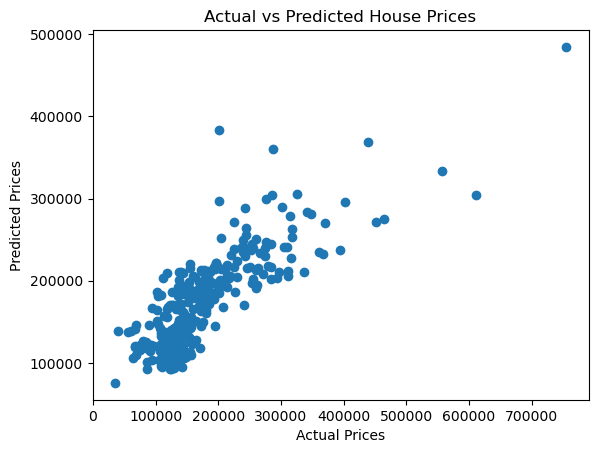

In [16]:
# Scatter plot to compare actual and predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
